# Out Of Lab Week 6
## November 7th
### Songgun Lee

**Goal** : 

I want to plot my data that I measured in the in lab  notes so that I can determine the linear mass density $\mu$ from the slope of the line. I also want to determine the uncertainty in the linear mass density.

Starting Time: 20:00


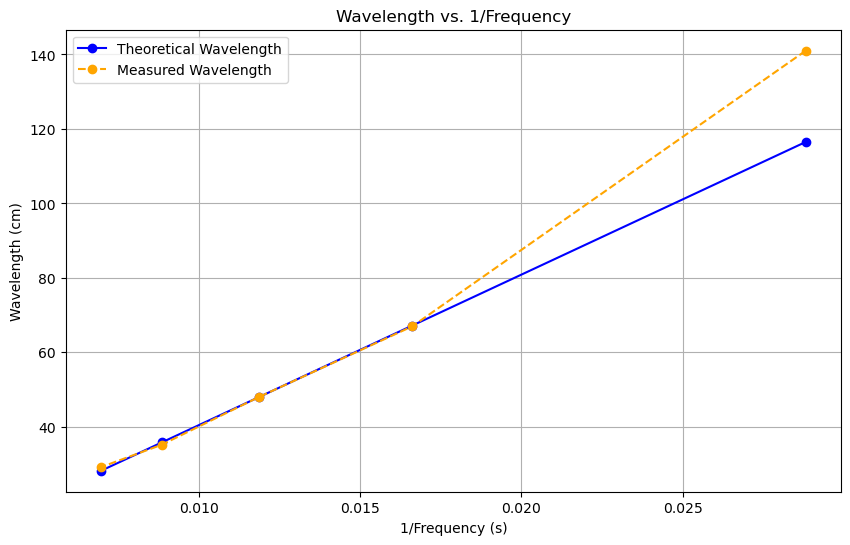

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # m/s^2, gravitational acceleration
M = 50 / 1000  # Convert mass from grams to kilograms (0.05 kg)
mu = 30*10**-5  # Linear mass density in kg/m after correct conversion

# Frequencies in Hz and calculate 1/f for the x-axis values
frequencies = np.array([34.71, 60.16, 84.27, 112.9, 143.3])
inv_frequencies = 1 / frequencies  # 1/f in seconds

# Calculate theoretical wavelengths using the corrected formula and convert to cm
wavelengths_theoretical_m = inv_frequencies * np.sqrt(g * M / mu)  # Wavelength in meters
wavelengths_theoretical_cm = wavelengths_theoretical_m * 100  # Convert to centimeters

# Measured wavelengths in cm provided
wavelengths_measured_cm = np.array([141, 67, 48, 35.2, 29.2])

# Plotting both theoretical and measured wavelengths
plt.figure(figsize=(10, 6))
plt.plot(inv_frequencies, wavelengths_theoretical_cm, marker='o', linestyle='-', color='b', label='Theoretical Wavelength')
plt.plot(inv_frequencies, wavelengths_measured_cm, marker='o', linestyle='--', color='orange', label='Measured Wavelength')
plt.title('Wavelength vs. 1/Frequency')
plt.xlabel('1/Frequency (s)')
plt.ylabel('Wavelength (cm)')
plt.grid(True)
plt.legend()
plt.show()

### Comments
I first decided to make a plot that compares the theoretical wavelenth and the measured wavelength, without the errorbars or line of best fit. This is straight from my intuition, because I wanted to compare the two without the errorbars first, so that I could see what my measured data is like, compared to that of the theoretical one. As we can see, the left 4 values actually line up pretty well with the theoretical wavelength. However, the right end value has a significant difference. I can definitely see why this is. The right end measured value is the measured wavelength, and I noticed the simple harmonic occuring from a little above $20Hz$. However, the maximum frequency that I measured that would still give a simple harmonic was $33 Hz$. This is a very big gap. I believe that the correct frequency is somewhere in between the two values. I chose the $33Hz$ as my first harmonic value because I believe that I should choose the maximum frequency for a reason. I have inserted a picture elaborating on the reason why I think the maximum value is important.

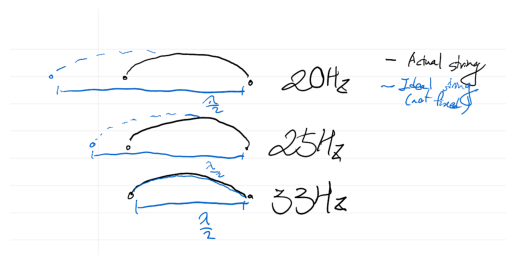

In [38]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Define the path to the image file
# Replace "YourUsername" with your actual username or provide the exact path if you're on a different OS
image_path = "/Users/johnlee/Desktop/max_frequency.png"

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

Since the other end of the vibrating string was connected to a mass of 50g, it acted as a fixed point. Therefore, when there were lower frequencies, it couldn't show the full half of the wavelength. When I increased the frequency higher than 33Hz, the ideal string would have had a shorter half-wavelength which would have been very hard to measure. This is the reason why I thought that the maximum frequency, 33Hz, was appropriate. Next, I will plot the actual full-version of the plot, including the errorbars. 

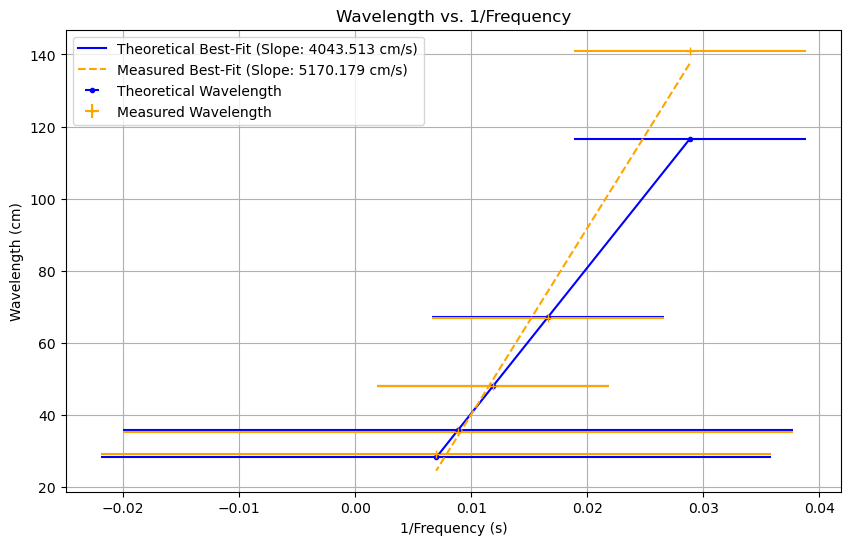

Theoretical Slope: 4043.513 ± 0.000 cm/s
Measured Slope: 5170 ± 320 cm/s
Chi-Squared: 722309.43
Calculated Linear Mass Density (mu): 2.999999984707321e-08 ± 5.305429053256942e-17 kg/m


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

# Constants
g = 9.81  # m/s^2, gravitational acceleration
M = 50 / 1000  # Convert mass from grams to kilograms (0.05 kg)
mu = 30 * 10**-5  # Linear mass density in kg/m after correct conversion

# Frequencies in Hz and calculate 1/f for the x-axis values
frequencies = np.array([34.71, 60.16, 84.27, 112.9, 143.3])
inv_frequencies = 1 / frequencies  # 1/f in seconds

# Calculate theoretical wavelengths in cm
wavelengths_theoretical_m = inv_frequencies * np.sqrt(g * M / mu)  # Wavelength in meters
wavelengths_theoretical_cm = wavelengths_theoretical_m * 100  # Convert to centimeters

# Measured wavelengths in cm and their uncertainties
wavelengths_measured_cm = np.array([141, 67, 48, 35.2, 29.2])
wavelengths_uncertainty_cm = np.full(len(wavelengths_measured_cm), 0.1 / np.sqrt(12))  # Uncertainty in measured wavelength

# Frequency uncertainties for measured and theoretical values
frequency_uncertainties = np.array([0.01, 0.01, 0.01, 0.1/np.sqrt(12), 0.1/np.sqrt(12)])

# Define a linear model for fitting
def linear_model(x, slope, intercept):
    return slope * x + intercept

# Fit the theoretical data to get the slope and intercept
theoretical_params, theoretical_cov = curve_fit(linear_model, inv_frequencies, wavelengths_theoretical_cm)
theoretical_slope, theoretical_intercept = theoretical_params
theoretical_slope_uncertainty = np.sqrt(np.diag(theoretical_cov))[0]

# Fit the measured data to get the slope and intercept
measured_params, measured_cov = curve_fit(linear_model, inv_frequencies, wavelengths_measured_cm)
measured_slope, measured_intercept = measured_params
measured_slope_uncertainty = np.sqrt(np.diag(measured_cov))[0]

# Calculate chi-squared for the fit
chi_squared = np.sum(((wavelengths_measured_cm - linear_model(inv_frequencies, *theoretical_params)) / wavelengths_uncertainty_cm)**2)

# Calculate uncertainty in the linear mass density using the uncertainty in the theoretical slope
# Since slope = sqrt(g * M / mu), we can solve for mu and propagate uncertainty in slope
mu_calculated = g * M / (theoretical_slope**2)
mu_uncertainty = mu_calculated * (2 * theoretical_slope_uncertainty / theoretical_slope)

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(inv_frequencies, wavelengths_theoretical_cm, xerr=frequency_uncertainties, yerr=None, fmt='.', color='b', label='Theoretical Wavelength')
plt.errorbar(inv_frequencies, wavelengths_measured_cm, xerr=frequency_uncertainties, yerr=wavelengths_uncertainty_cm, fmt='+', color='orange', label='Measured Wavelength')

# Plot best-fit lines
plt.plot(inv_frequencies, linear_model(inv_frequencies, *theoretical_params), linestyle='-', color='blue', label=f'Theoretical Best-Fit (Slope: {theoretical_slope:.3f} cm/s)')
plt.plot(inv_frequencies, linear_model(inv_frequencies, *measured_params), linestyle='--', color='orange', label=f'Measured Best-Fit (Slope: {measured_slope:.3f} cm/s)')

# Labels and Legend
plt.title('Wavelength vs. 1/Frequency')
plt.xlabel('1/Frequency (s)')
plt.ylabel('Wavelength (cm)')
plt.grid(True)
plt.legend()

# Show Plot
plt.show()

# Print Results
print(f"Theoretical Slope: {theoretical_slope:.3f} ± {theoretical_slope_uncertainty:.3f} cm/s")
print(f"Measured Slope: {measured_slope:.0f} ± {measured_slope_uncertainty:.0f} cm/s")
print(f"Chi-Squared: {chi_squared:.2f}")
print(f"Calculated Linear Mass Density (mu): {mu_calculated} ± {mu_uncertainty} kg/m")

### Comments: 
This plot has serious issues. First, you can see that the errorbars of the measured are very big. This is because I did not repeat my measurements for the wavelength multiple times. As I stated in my in-lab notes, I did not take the time to calmly set the procedures for my measurements. I should have sat down, thought about what my objectives for my in-lab and out-of-lab notes are, and then proceeded to take measurements. This time I was in a hurry because I had a meeting at 18:30 on Wednesday and I also had some stomach trouble. From now on, I will take some time to think about my objective and write down the process clearly so that I wouldn't miss necessary steps. Because I took only 1 measurement, there is a very high possibility of random errors. The chi-squared is also multiple **digits** away from 1, which is seriously disappointing. This was actually the worst plot that I have ever plotted, and I am not only mad at myself but also very embarrassed.

If we look closely at the coding of the errorbars, you can see that I have chosen $ 0.01 Hz $ for the first three frequencies and for the next ones, I chose the uncertainty using $\sigma = \frac{\Delta}{\sqrt{12}}$ with the $\Delta$ being the resolution of the function generator. The reason why I chose $ 0.01 Hz $ for the first three frequencies is because the function generator did not give a fixed frequency. It kept on ticking between $34.71$ and $34.72$ and also for the next two, the hundredth digit wasn't a fixed value but was rather ticking 1 number away. Therefore, I decided that it is appropriate to use $0.01 Hz$ as the uncertainty. For the other two values, I used the error regarding the resolution because I only took one measurement and the resolution of the function generator for frequencies above 99.99 only showed digits to the closest tenth. In that scenario, the resolution $\Delta$ was 0.1 since the display could only show up to 4 numbers.

$$\chi^2 = \sum_{n=1}^N \frac{(y_i - y(x_i))^2}{\sigma_i^2}$$ is the equation I used for chi-squared.

$$\sigma_{\text{slope}} = \sqrt{\left( \frac{\partial \lambda}{\partial f} \sigma_f \right)^2 + \left( \frac{\partial \lambda}{\partial \lambda} \sigma_{\lambda} \right)^2}$$ is the equation I used for the uncertainty in the slope of the best-fit line.

$$\mu = \frac{g M}{\text{slope}^2}$$ is the equation I used to get the linear mass density.

$$\sigma_{\mu} = \mu \cdot \frac{2 \cdot \sigma_{\text{slope}}}{\text{slope}}$$ is the equation I used for the uncertainty of linear mass density.

## Conclusion

Through this analysis, I aimed to determine the linear mass density  $\mu$  of the vibrating string by plotting wavelength data against  1/f  and extracting the slope. By calculating the slope of both theoretical and measured data, I obtained a value for  $\mu$  with an associated uncertainty. However, several factors influenced the accuracy of this experiment, as evidenced by the large uncertainties in the measured wavelengths and the high chi-squared value, which is significantly above 1. This high chi-squared suggests that the model does not fit the measured data well, due to measurement inconsistencies and the limited number of data points. Also, since a real world string actually has thickness, we can know that there is actually a systematic error. I believe that the thickness and total volume should be considered as well.

One notable issue was the large error bars for the measured wavelengths, resulting from only a single measurement for each frequency. This lack of repeat measurements likely introduced random errors, as I did not take enough time to carefully set up the measurement process. The frequency uncertainties, particularly for higher frequencies, were also substantial due to the limited precision of the function generator at higher ranges. These factors contributed to the discrepancy between the theoretical and measured slopes.

In future experiments, I plan to take additional time to carefully consider the measurement setup, documenting each step in detail to ensure consistency and accuracy. Increasing the number of trials for each frequency would allow me to calculate more reliable averages and reduce random error. Additionally, a more precise frequency generator or methods for stabilizing frequency output could help improve the reliability of the frequency measurements, especially at higher frequencies.


### End Time: 11/8 00:00AM

### Start time 11/8 18:10 PM

I had a quick talk with Petros because I found a lot of errors. Underneath is the plot that I fixed, with the units of length converted to meters and calculating 
$$\sigma_{\frac{1}{f}} = \left| \frac{\partial \left( \frac{1}{f} \right)}{\partial f} \right| \cdot \sigma_f $$ = $$\sigma_{\frac{1}{f}} = -\frac{1}{f^2} \cdot \sigma_f$$


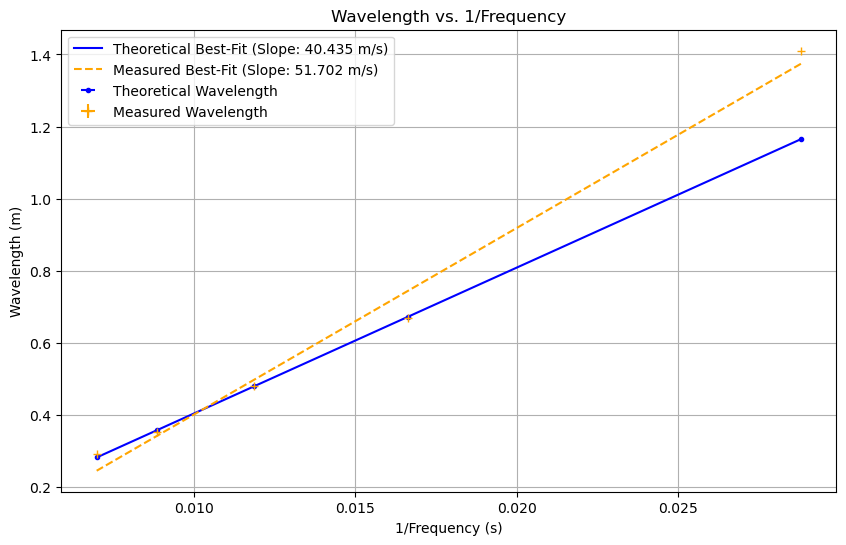

Theoretical Slope: 40.435 ± 0.000 m/s
Measured Slope: 52 ± 3 m/s
Chi-Squared: 722309
Calculated Linear Mass Density (mu): 0.0003 ± 0.0000 kg/m


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

# Constants
g = 9.81  # m/s^2, gravitational acceleration
M = 50 / 1000  # Convert mass from grams to kilograms (0.05 kg)
mu = 30 * 10**-5  # Linear mass density in kg/m after correct conversion

# Frequencies in Hz and calculate 1/f for the x-axis values
frequencies = np.array([34.71, 60.16, 84.27, 112.9, 143.3])
inv_frequencies = 1 / frequencies  # 1/f in seconds

# Frequency uncertainties
frequency_uncertainties = np.array([0.01, 0.01, 0.01, 0.1/np.sqrt(12), 0.1/np.sqrt(12)])

# Calculate x-axis (1/f) uncertainties as -(1/f^2)*(uncertainty of f)
inv_frequency_uncertainties = (1 / frequencies**2) * frequency_uncertainties

# Calculate theoretical wavelengths in meters
wavelengths_theoretical_m = inv_frequencies * np.sqrt(g * M / mu)  # Wavelength in meters

# Measured wavelengths in meters and their uncertainties
wavelengths_measured_m = np.array([141, 67, 48, 35.2, 29.2]) / 100  # Convert from cm to meters
wavelengths_uncertainty_m = np.full(len(wavelengths_measured_m), 0.1 / np.sqrt(12) / 100)  # Convert to meters

# Define a linear model for fitting
def linear_model(x, slope, intercept):
    return slope * x + intercept

# Fit the theoretical data to get the slope and intercept
theoretical_params, theoretical_cov = curve_fit(linear_model, inv_frequencies, wavelengths_theoretical_m)
theoretical_slope, theoretical_intercept = theoretical_params
theoretical_slope_uncertainty = np.sqrt(np.diag(theoretical_cov))[0]

# Fit the measured data to get the slope and intercept
measured_params, measured_cov = curve_fit(linear_model, inv_frequencies, wavelengths_measured_m)
measured_slope, measured_intercept = measured_params
measured_slope_uncertainty = np.sqrt(np.diag(measured_cov))[0]

# Calculate chi-squared for the fit
chi_squared = np.sum(((wavelengths_measured_m - linear_model(inv_frequencies, *theoretical_params)) / wavelengths_uncertainty_m)**2)

# Calculate uncertainty in the linear mass density using the uncertainty in the theoretical slope
# Since slope = sqrt(g * M / mu), we can solve for mu and propagate uncertainty in slope
mu_calculated = g * M / (theoretical_slope**2)
mu_uncertainty = mu_calculated * (2 * theoretical_slope_uncertainty / theoretical_slope)

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(inv_frequencies, wavelengths_theoretical_m, xerr=inv_frequency_uncertainties, yerr=None, fmt='.', color='b', label='Theoretical Wavelength')
plt.errorbar(inv_frequencies, wavelengths_measured_m, xerr=inv_frequency_uncertainties, yerr=wavelengths_uncertainty_m, fmt='+', color='orange', label='Measured Wavelength')

# Plot best-fit lines
plt.plot(inv_frequencies, linear_model(inv_frequencies, *theoretical_params), linestyle='-', color='blue', label=f'Theoretical Best-Fit (Slope: {theoretical_slope:.3f} m/s)')
plt.plot(inv_frequencies, linear_model(inv_frequencies, *measured_params), linestyle='--', color='orange', label=f'Measured Best-Fit (Slope: {measured_slope:.3f} m/s)')

# Labels and Legend
plt.title('Wavelength vs. 1/Frequency')
plt.xlabel('1/Frequency (s)')
plt.ylabel('Wavelength (m)')
plt.grid(True)
plt.legend()

# Show Plot
plt.show()

# Print Results
print(f"Theoretical Slope: {theoretical_slope:.3f} ± {theoretical_slope_uncertainty:.3f} m/s")
print(f"Measured Slope: {measured_slope:.0f} ± {measured_slope_uncertainty:.0f} m/s")
print(f"Chi-Squared: {chi_squared:.0f}")
print(f"Calculated Linear Mass Density (mu): {mu_calculated:.4f} ± {mu_uncertainty:.4f} kg/m")


Now the slope and the linear mass density seem to be somewhat closer to the value I received for my in-labe notes, which was 0.003kg/m. Still, I am 1 order of magnitude away from being correct. I will try and find out why this is next week in class!

### End time: 11/8 18:30